The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


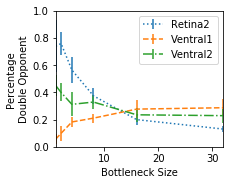

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from statistics import load

spatial = pd.read_pickle('logs/spatial.pd')
spectral = pd.read_pickle('logs/devalois.pd')

plt.figure(figsize=(3,2.5))
opps = load.double(spectral, spatial)

retina2 = opps[opps['layer'] == 'retina_relu2']
ventral0 = opps[opps['layer'] == 'ventral_relu0']
ventral1 = opps[opps['layer'] == 'ventral_relu1']

plt.errorbar(retina2['n_bn'], retina2['mean_rel_amount'], yerr=retina2['std_rel_amount'], label='Retina2', linestyle=':')
plt.errorbar(ventral0['n_bn'], ventral0['mean_rel_amount'], yerr=ventral0['std_rel_amount'], label='Ventral1', linestyle='--')
plt.errorbar(ventral1['n_bn'], ventral1['mean_rel_amount'], yerr=ventral1['std_rel_amount'], label='Ventral2', linestyle='-.')
plt.xlim(1, 32)
plt.ylim(0, 1)
plt.legend()
plt.xlabel('Bottleneck Size')
plt.ylabel('Percentage \nDouble Opponent')
plt.savefig('figures/double_opponent.eps', bbox_inches='tight')